In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
#load the data and pront top or rows
data = pd.read_csv('sport_data.csv')
data.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [5]:
#basic data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     18 non-null     int64 
 1   Height  18 non-null     int64 
 2   Sex     18 non-null     object
 3   Sport   18 non-null     object
dtypes: int64(2), object(2)
memory usage: 704.0+ bytes


In [6]:
data.shape

(18, 4)

In [7]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


In [10]:
data.isnull().sum()

Age       0
Height    0
Sex       0
Sport     0
dtype: int64

In [11]:
# data pre-process 

data['Sex'].replace(['Female','Male'],[0,1],inplace=True)

In [12]:
data.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [13]:
#split data in X and y 
X = data.drop(columns='Sport')
y = data.drop(columns=['Age','Height','Sex'])

In [15]:
X.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [16]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [24]:
#import model and train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [25]:
# split data train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [26]:
#train Model
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [27]:
#apply on test data 
pred = clf.predict(X_test)

In [30]:
# accuracy find using sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test,pred)

In [31]:
#accuracy of model
accuracy

0.6666666666666666

In [33]:
#test on new data

new_input_data = clf.predict([[15,4,1]])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [34]:
#result of model
new_input_data

array(['Hockey'], dtype=object)

In [40]:
#install jovlib
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [42]:
#save model
# from sklearn.externals import joblib
import joblib

In [43]:
joblib.dump(clf,'sport_model_ml.joblib')

['sport_model_ml.joblib']

In [45]:
pip install --upgrade scikit-learn


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\pc\\anaconda3\\Lib\\site-packages\\sklearn\\~-ibs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [47]:
# from sklearn.metrics import plot_confusion_matrix

In [48]:
c_matrix = confusion_matrix(y_test,pred)

In [49]:
c_matrix

array([[1, 0, 1],
       [0, 1, 0],
       [0, 1, 2]], dtype=int64)

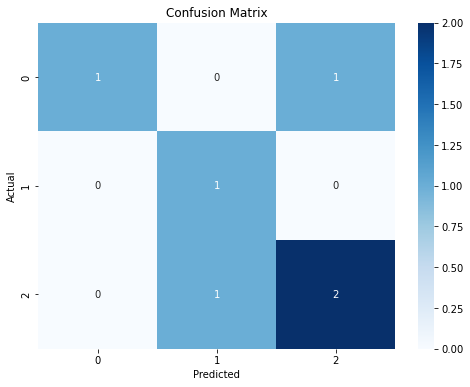

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and pred are your true and predicted labels
c_matrix = confusion_matrix(y_test, pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Basketball       1.00      0.50      0.67         2
      Hockey       0.50      1.00      0.67         1
      Soccer       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.72      0.72      0.67         6
weighted avg       0.75      0.67      0.67         6

